In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             silhouette_score, davies_bouldin_score)
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, pearsonr, normaltest
import warnings

warnings.filterwarnings('ignore')

# ETAPA 1: CARREGAMENTO E ANÁLISE EXPLORATÓRIA DOS DADOS

In [0]:
# ETAPA 1: CARREGAMENTO DOS DADOS 

df = pd.read_csv('insurance_abt.csv')

In [0]:
# VIZUALIZAÇÃO DOS DADOS 

display(df)

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33.0,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107
60,female,25.84,0,no,northwest,28923.13692


In [0]:
# INFORMAÇÕES BÁSICAS

print(f"   • Shape: {df.shape[0]} registros x {df.shape[1]} colunas")
print(f"   • Memória utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

   • Shape: 1338 registros x 7 colunas
   • Memória utilizada: 286.54 KB


In [0]:
# Informações das Colunas

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [0]:
#  Estatísticas Descritivas

print(df.describe().round(2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [0]:
#  Verificação de Valores Faltantes

missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   ✓ Não há valores faltantes no dataset!")
else:
    print(missing_values[missing_values > 0])

   ✓ Não há valores faltantes no dataset!


In [0]:
# Distribuição das Variáveis Categóricas

for col in ['sex', 'smoker', 'region']:
    print(f"\n{col.upper()}:")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    for idx in counts.index:
        print(f"   • {idx}: {counts[idx]} ({percentages[idx]:.1f}%)")


SEX:
   • male: 676 (50.5%)
   • female: 662 (49.5%)

SMOKER:
   • no: 1064 (79.5%)
   • yes: 274 (20.5%)

REGION:
   • southeast: 364 (27.2%)
   • southwest: 325 (24.3%)
   • northwest: 325 (24.3%)
   • northeast: 324 (24.2%)


In [0]:
print(f"\n Estatísticas da Variável Target (charges):")
print(f"   • Média: ${df['charges'].mean():.2f}")
print(f"   • Mediana: ${df['charges'].median():.2f}")
print(f"   • Desvio Padrão: ${df['charges'].std():.2f}")
print(f"   • Mínimo: ${df['charges'].min():.2f}")
print(f"   • Máximo: ${df['charges'].max():.2f}")


 Estatísticas da Variável Target (charges):
   • Média: $13270.42
   • Mediana: $9382.03
   • Desvio Padrão: $12110.01
   • Mínimo: $1121.87
   • Máximo: $63770.43


# ETAPA 2: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

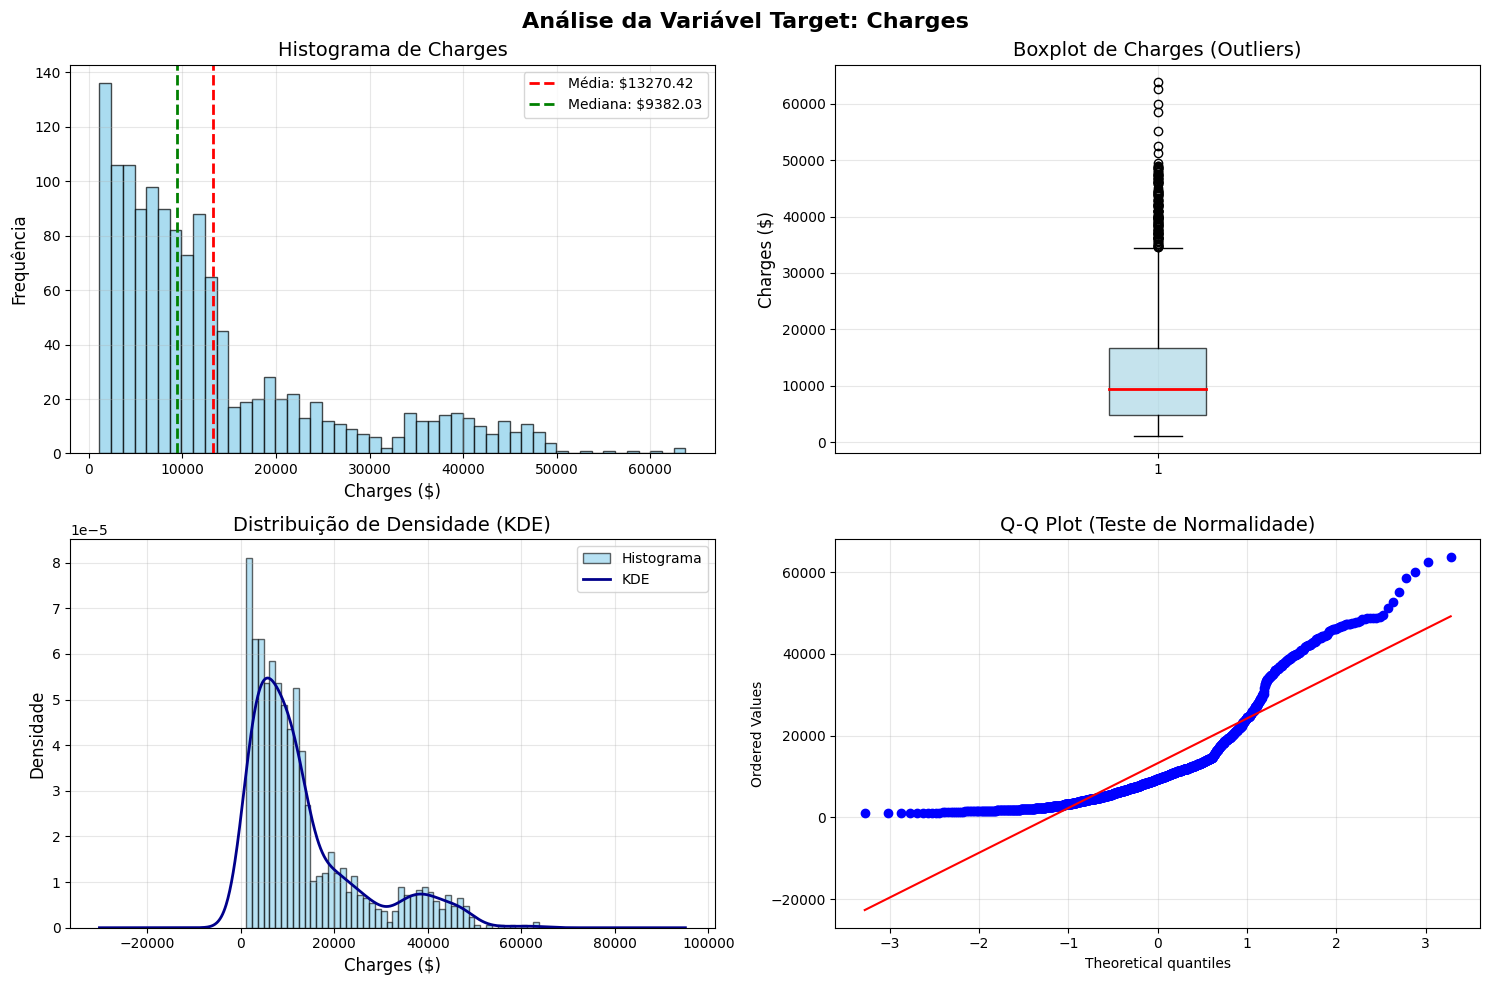


    ESTATÍSTICAS:
      • Média: $13270.42
      • Mediana: $9382.03
      • Desvio Padrão: $12110.01
      • Assimetria (Skewness): 1.52
      • Curtose: 1.61


In [0]:
# 2.1 Distribuição da Variável Target (Charges)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análise da Variável Target: Charges', fontsize=16, fontweight='bold')

# Histograma
axes[0, 0].hist(df['charges'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['charges'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: ${df["charges"].mean():.2f}')
axes[0, 0].axvline(df['charges'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${df["charges"].median():.2f}')
axes[0, 0].set_xlabel('Charges ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].set_title('Histograma de Charges', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Boxplot
axes[0, 1].boxplot(df['charges'], vert=True, patch_artist=True, 
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Charges ($)', fontsize=12)
axes[0, 1].set_title('Boxplot de Charges (Outliers)', fontsize=14)
axes[0, 1].grid(alpha=0.3)

# KDE (Kernel Density Estimation)
axes[1, 0].hist(df['charges'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histograma')
df['charges'].plot(kind='density', ax=axes[1, 0], color='darkblue', linewidth=2, label='KDE')
axes[1, 0].set_xlabel('Charges ($)', fontsize=12)
axes[1, 0].set_ylabel('Densidade', fontsize=12)
axes[1, 0].set_title('Distribuição de Densidade (KDE)', fontsize=14)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Q-Q Plot (teste de normalidade visual)
stats.probplot(df['charges'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Teste de Normalidade)', fontsize=14)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas
print(f"\n    ESTATÍSTICAS:")
print(f"      • Média: ${df['charges'].mean():.2f}")
print(f"      • Mediana: ${df['charges'].median():.2f}")
print(f"      • Desvio Padrão: ${df['charges'].std():.2f}")
print(f"      • Assimetria (Skewness): {df['charges'].skew():.2f}")
print(f"      • Curtose: {df['charges'].kurtosis():.2f}")

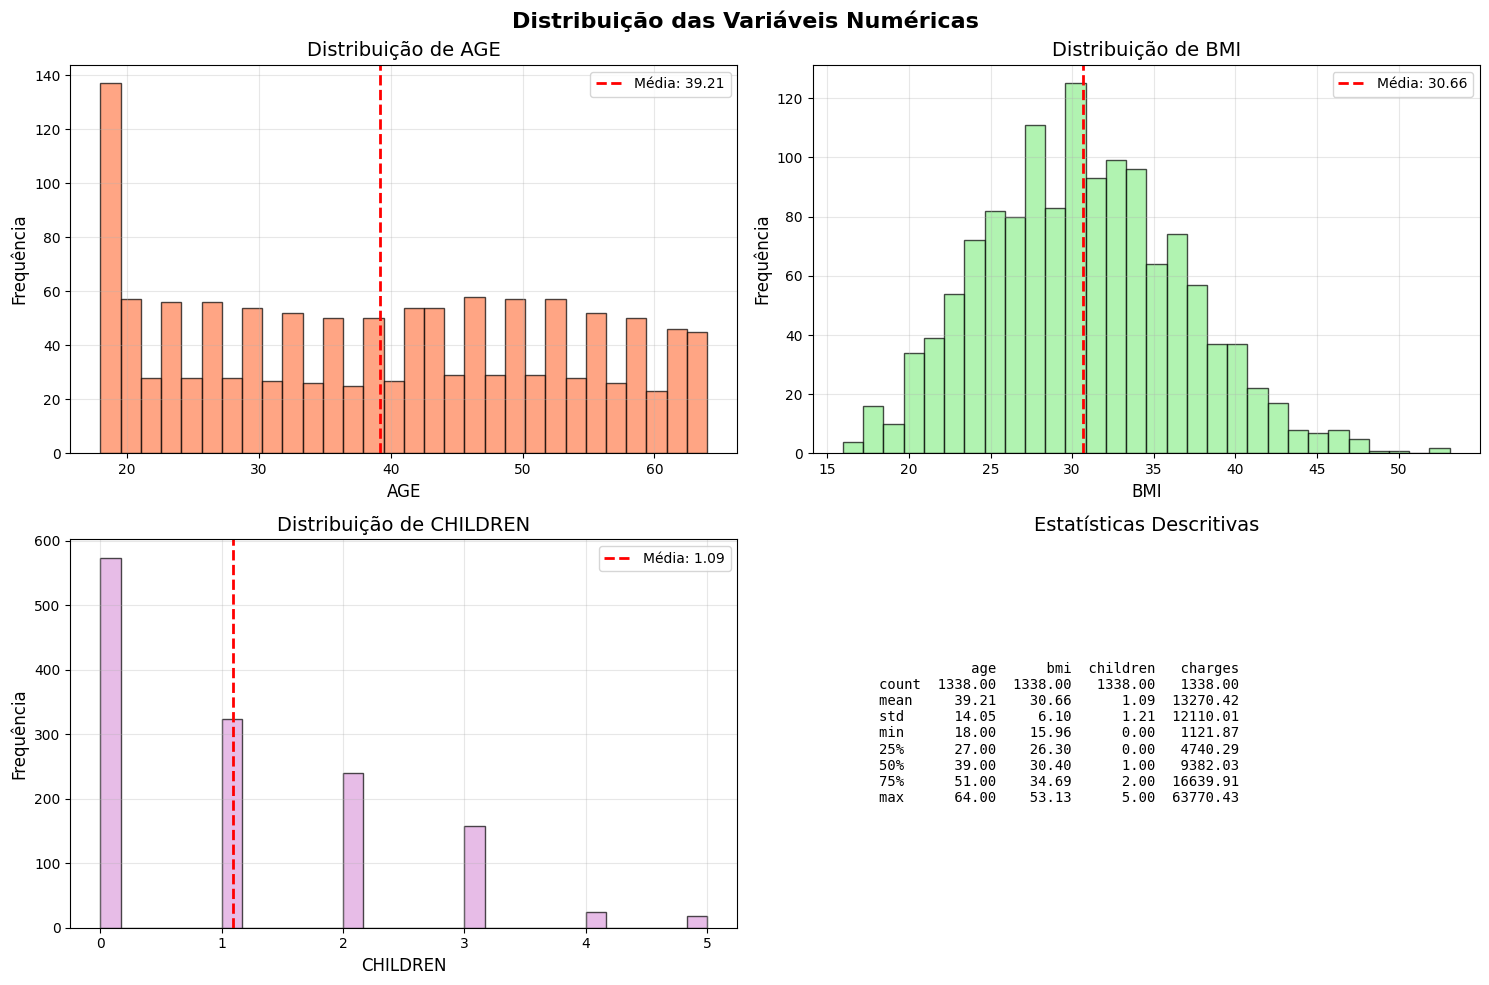

In [0]:
# 2.2 Distribuição das Variáveis Numéricas

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, fontweight='bold')

numeric_cols = ['age', 'bmi', 'children']
colors = ['coral', 'lightgreen', 'plum']

for idx, (col, color) in enumerate(zip(numeric_cols, colors)):
    row = idx // 2
    col_idx = idx % 2
    
    axes[row, col_idx].hist(df[col], bins=30, color=color, edgecolor='black', alpha=0.7)
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, 
                               label=f'Média: {df[col].mean():.2f}')
    axes[row, col_idx].set_xlabel(col.upper(), fontsize=12)
    axes[row, col_idx].set_ylabel('Frequência', fontsize=12)
    axes[row, col_idx].set_title(f'Distribuição de {col.upper()}', fontsize=14)
    axes[row, col_idx].legend()
    axes[row, col_idx].grid(alpha=0.3)

# Último subplot: estatísticas descritivas em texto
axes[1, 1].axis('off')
stats_text = df[['age', 'bmi', 'children', 'charges']].describe().round(2).to_string()
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=10, family='monospace', 
                verticalalignment='center', transform=axes[1, 1].transAxes)
axes[1, 1].set_title('Estatísticas Descritivas', fontsize=14)

plt.tight_layout()
plt.show()

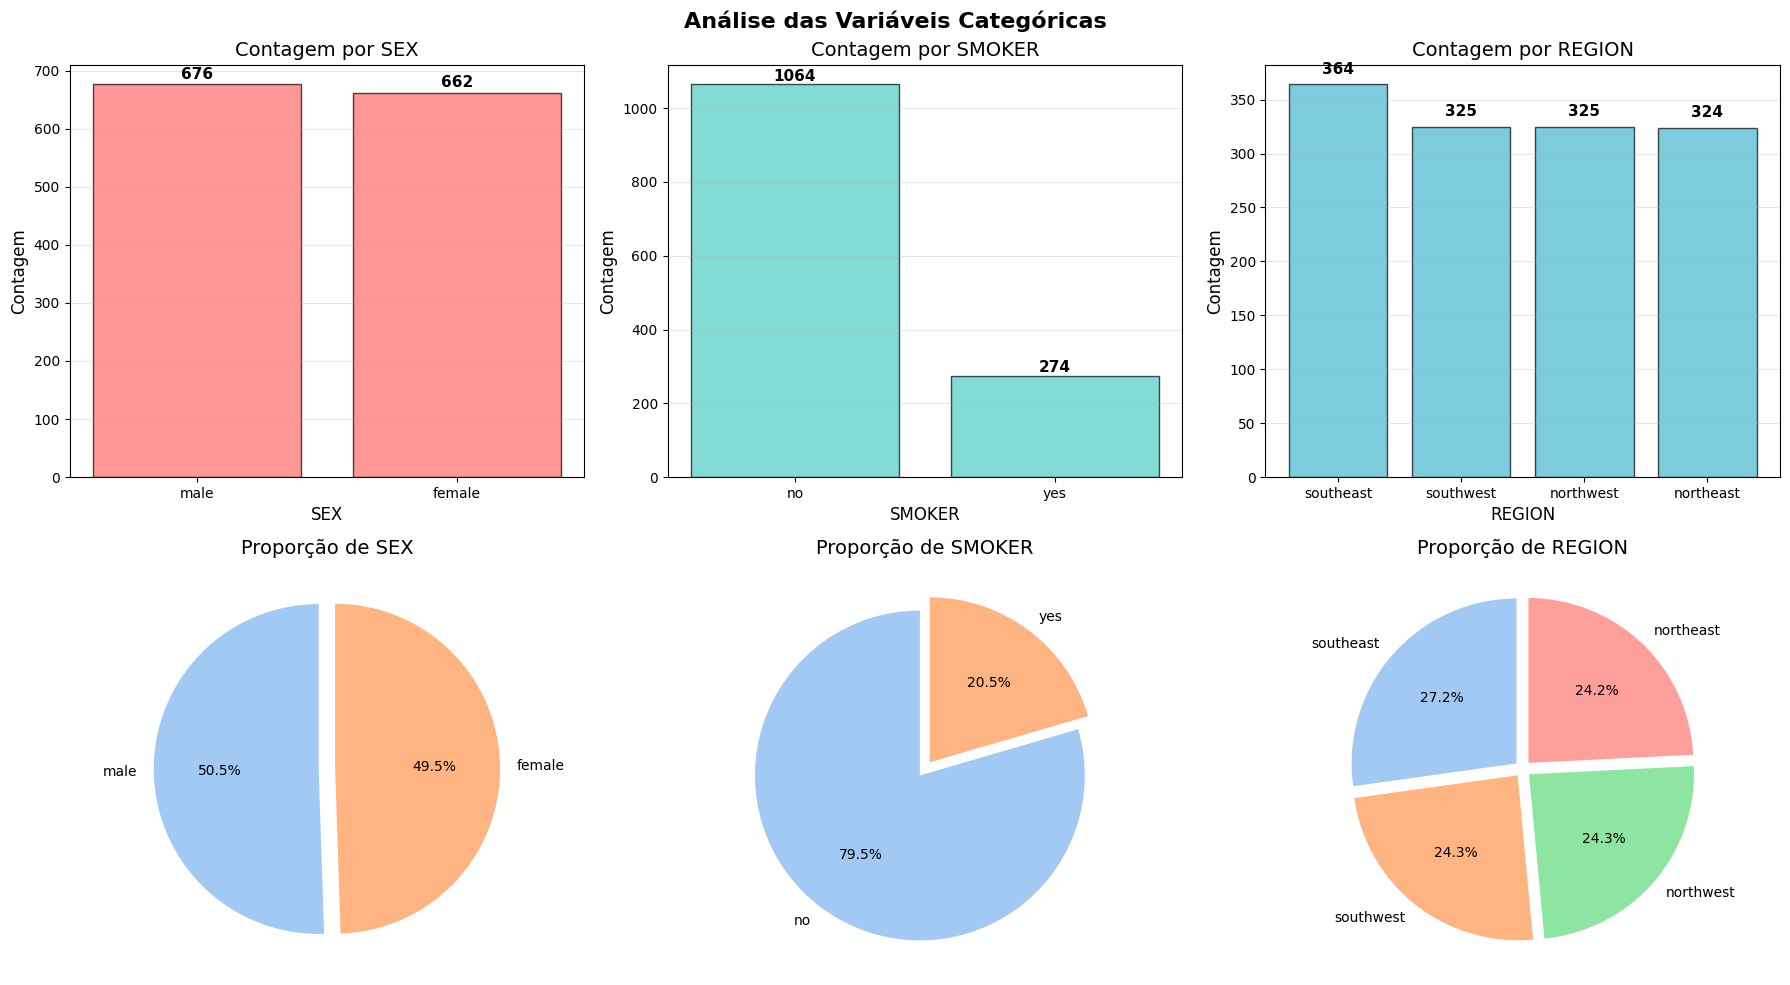

In [0]:
# 2.3 Análise das Variáveis Categóricas

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Análise das Variáveis Categóricas', fontsize=16, fontweight='bold')

categorical_cols = ['sex', 'smoker', 'region']
colors_cat = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (col, color) in enumerate(zip(categorical_cols, colors_cat)):
    # Contagem
    counts = df[col].value_counts()
    
    # Gráfico de barras
    axes[0, idx].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.7)
    axes[0, idx].set_xlabel(col.upper(), fontsize=12)
    axes[0, idx].set_ylabel('Contagem', fontsize=12)
    axes[0, idx].set_title(f'Contagem por {col.upper()}', fontsize=14)
    axes[0, idx].grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, (category, value) in enumerate(zip(counts.index, counts.values)):
        axes[0, idx].text(i, value + 10, str(value), ha='center', fontsize=11, fontweight='bold')
    
    # Gráfico de pizza
    axes[1, idx].pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
                     colors=sns.color_palette('pastel'), startangle=90, explode=[0.05]*len(counts))
    axes[1, idx].set_title(f'Proporção de {col.upper()}', fontsize=14)

plt.tight_layout()
plt.show()

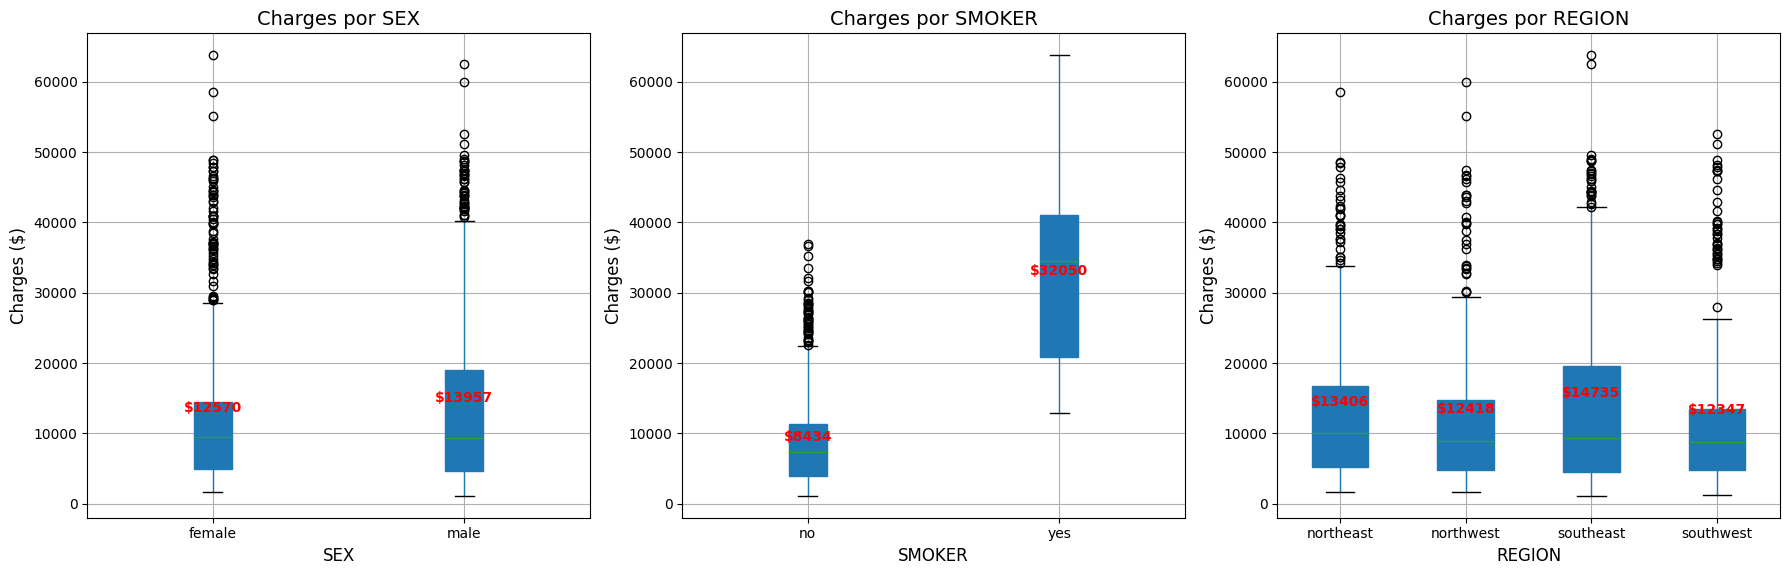


    MÉDIAS DE CHARGES POR CATEGORIA:

   SEX:
      • female: Média=$12569.58, Std=$11128.70, N=662
      • male: Média=$13956.75, Std=$12971.03, N=676

   SMOKER:
      • no: Média=$8434.27, Std=$5993.78, N=1064
      • yes: Média=$32050.23, Std=$11541.55, N=274

   REGION:
      • northeast: Média=$13406.38, Std=$11255.80, N=324
      • northwest: Média=$12417.58, Std=$11072.28, N=325
      • southeast: Média=$14735.41, Std=$13971.10, N=364
      • southwest: Média=$12346.94, Std=$11557.18, N=325


In [0]:
# 2.4 Análise Bivariada: Charges vs Variáveis Categóricas

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Charges por Variáveis Categóricas', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    df.boxplot(column='charges', by=col, ax=axes[idx], patch_artist=True)
    axes[idx].set_xlabel(col.upper(), fontsize=12)
    axes[idx].set_ylabel('Charges ($)', fontsize=12)
    axes[idx].set_title(f'Charges por {col.upper()}', fontsize=14)
    axes[idx].get_figure().suptitle('')  # Remove título duplicado
    
    # Adicionar médias
    means = df.groupby(col)['charges'].mean()
    for i, (category, mean) in enumerate(means.items()):
        axes[idx].text(i+1, mean, f'${mean:.0f}', ha='center', va='bottom', 
                      fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Análise estatística por grupo
print(f"\n    MÉDIAS DE CHARGES POR CATEGORIA:")
for col in categorical_cols:
    print(f"\n   {col.upper()}:")
    means = df.groupby(col)['charges'].agg(['mean', 'std', 'count'])
    for idx, row in means.iterrows():
        print(f"      • {idx}: Média=${row['mean']:.2f}, Std=${row['std']:.2f}, N={int(row['count'])}")

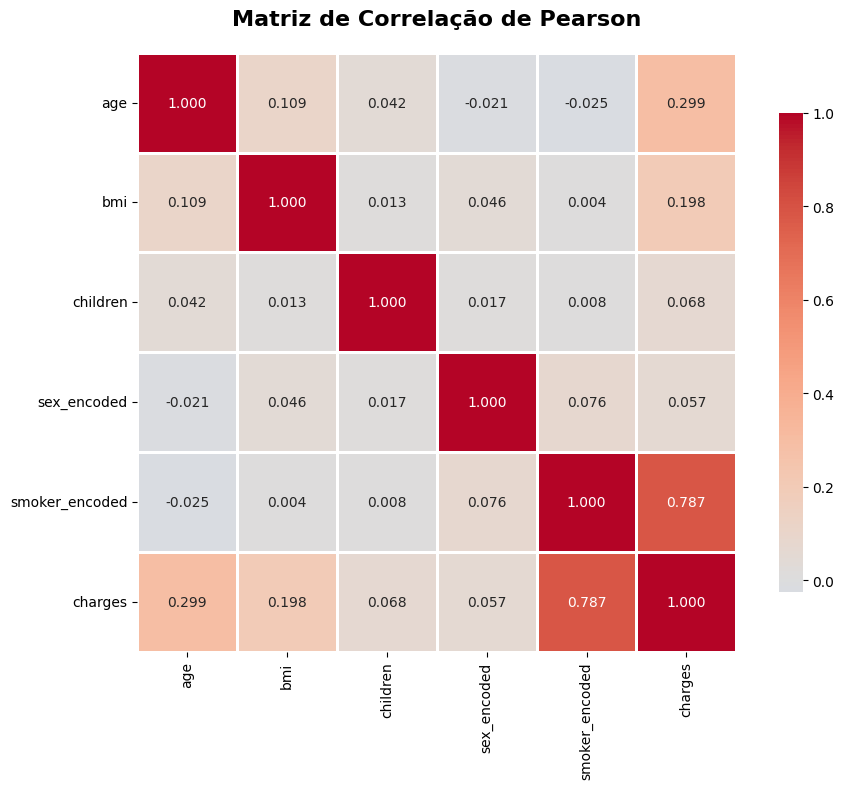


    CORRELAÇÕES COM CHARGES:
      • age: 0.2990 (Fraca)
      • bmi: 0.1983 (Fraca)
      • children: 0.0680 (Fraca)
      • smoker_encoded: 0.7873 (Forte)


In [0]:
# 2.5 Matriz de Correlação

# Criar cópia com encoding para correlação
df_corr = df.copy()
df_corr['sex_encoded'] = (df_corr['sex'] == 'male').astype(int)
df_corr['smoker_encoded'] = (df_corr['smoker'] == 'yes').astype(int)

correlation_cols = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'charges']
corr_matrix = df_corr[correlation_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Matriz de Correlação de Pearson', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"\n    CORRELAÇÕES COM CHARGES:")
for col in ['age', 'bmi', 'children', 'smoker_encoded']:
    corr = corr_matrix.loc[col, 'charges']
    print(f"      • {col}: {corr:.4f} ({'Forte' if abs(corr) > 0.7 else 'Moderada' if abs(corr) > 0.4 else 'Fraca'})")

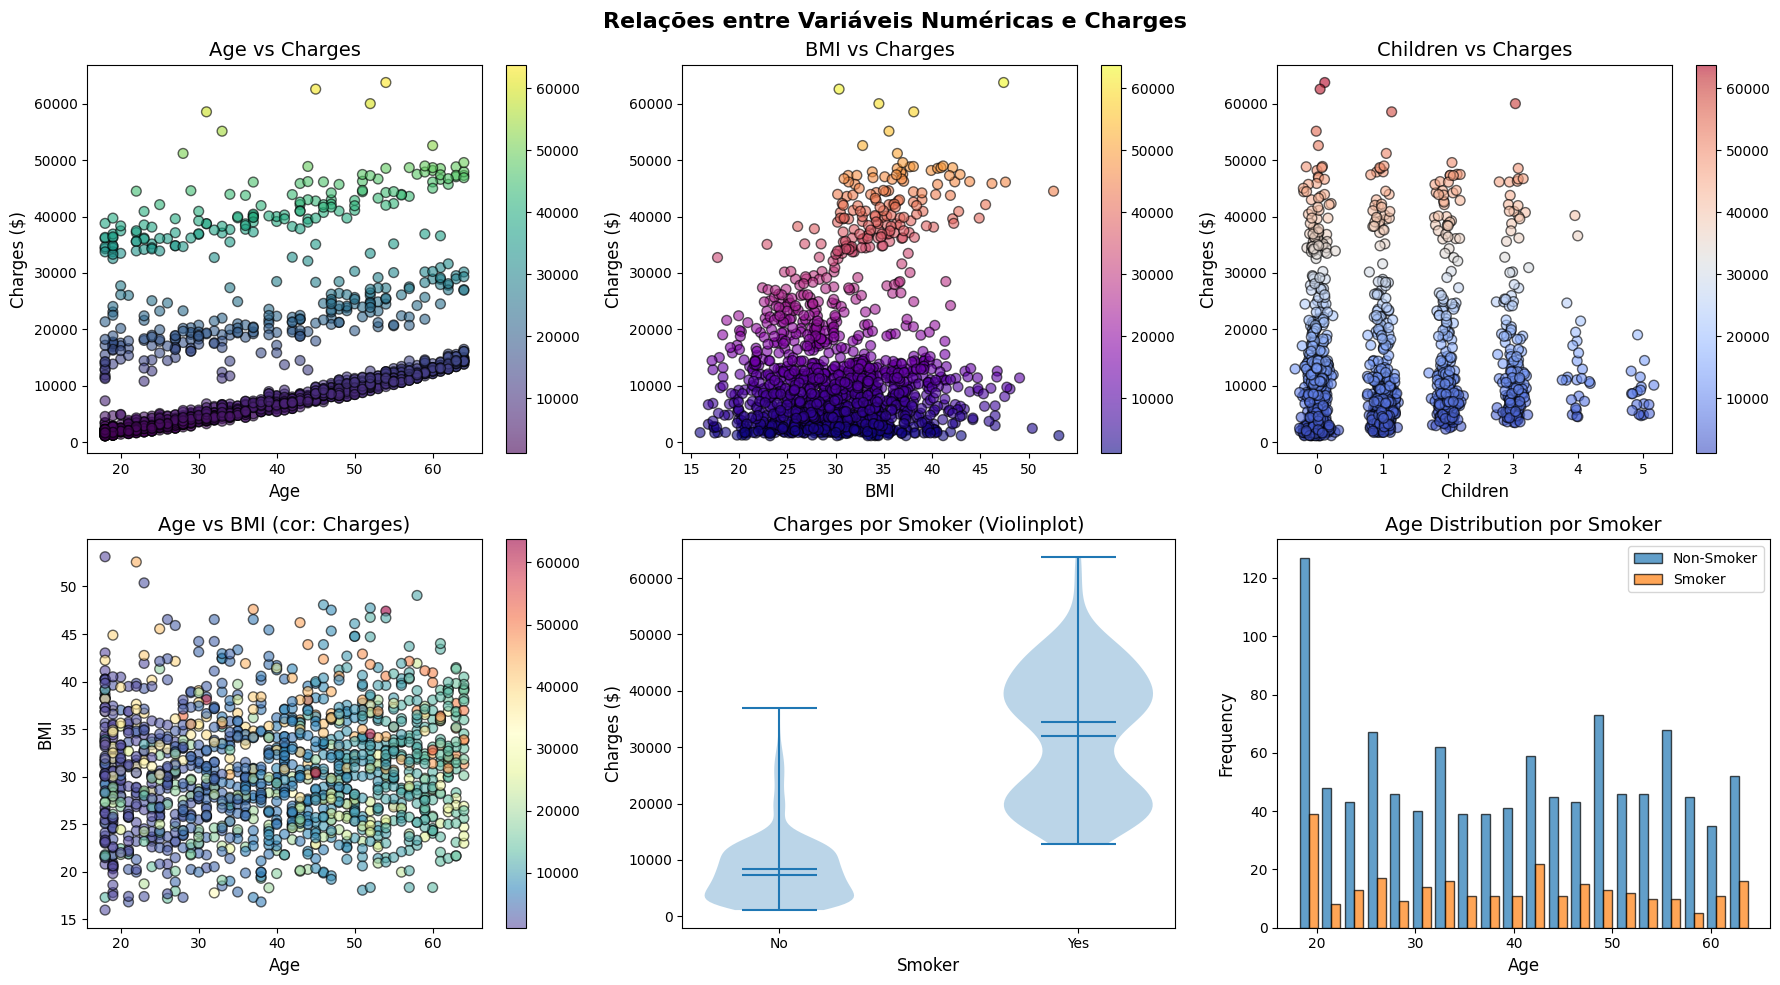

In [0]:
# 2.6 Scatter Plots - Relações Numéricas

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relações entre Variáveis Numéricas e Charges', fontsize=16, fontweight='bold')

# Age vs Charges
scatter1 = axes[0, 0].scatter(df['age'], df['charges'], c=df['charges'], 
                              cmap='viridis', alpha=0.6, s=50, edgecolor='black')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Charges ($)', fontsize=12)
axes[0, 0].set_title('Age vs Charges', fontsize=14)
plt.colorbar(scatter1, ax=axes[0, 0])

# BMI vs Charges
scatter2 = axes[0, 1].scatter(df['bmi'], df['charges'], c=df['charges'], 
                              cmap='plasma', alpha=0.6, s=50, edgecolor='black')
axes[0, 1].set_xlabel('BMI', fontsize=12)
axes[0, 1].set_ylabel('Charges ($)', fontsize=12)
axes[0, 1].set_title('BMI vs Charges', fontsize=14)
plt.colorbar(scatter2, ax=axes[0, 1])

# Children vs Charges
children_jitter = df['children'] + np.random.normal(0, 0.1, len(df))
scatter3 = axes[0, 2].scatter(children_jitter, df['charges'], c=df['charges'], 
                              cmap='coolwarm', alpha=0.6, s=50, edgecolor='black')
axes[0, 2].set_xlabel('Children', fontsize=12)
axes[0, 2].set_ylabel('Charges ($)', fontsize=12)
axes[0, 2].set_title('Children vs Charges', fontsize=14)
plt.colorbar(scatter3, ax=axes[0, 2])

# Age vs BMI (colorido por Charges)
scatter4 = axes[1, 0].scatter(df['age'], df['bmi'], c=df['charges'], 
                              cmap='Spectral_r', alpha=0.6, s=50, edgecolor='black')
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('BMI', fontsize=12)
axes[1, 0].set_title('Age vs BMI (cor: Charges)', fontsize=14)
plt.colorbar(scatter4, ax=axes[1, 0])

# Smoker vs Charges (violinplot)
smoker_order = ['no', 'yes']
parts = axes[1, 1].violinplot([df[df['smoker'] == 'no']['charges'], 
                                df[df['smoker'] == 'yes']['charges']], 
                               positions=[0, 1], showmeans=True, showmedians=True)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No', 'Yes'])
axes[1, 1].set_xlabel('Smoker', fontsize=12)
axes[1, 1].set_ylabel('Charges ($)', fontsize=12)
axes[1, 1].set_title('Charges por Smoker (Violinplot)', fontsize=14)

# Age distribution por Smoker
axes[1, 2].hist([df[df['smoker'] == 'no']['age'], df[df['smoker'] == 'yes']['age']], 
                bins=20, label=['Non-Smoker', 'Smoker'], alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('Age', fontsize=12)
axes[1, 2].set_ylabel('Frequency', fontsize=12)
axes[1, 2].set_title('Age Distribution por Smoker', fontsize=14)
axes[1, 2].legend()

plt.tight_layout()
plt.show()

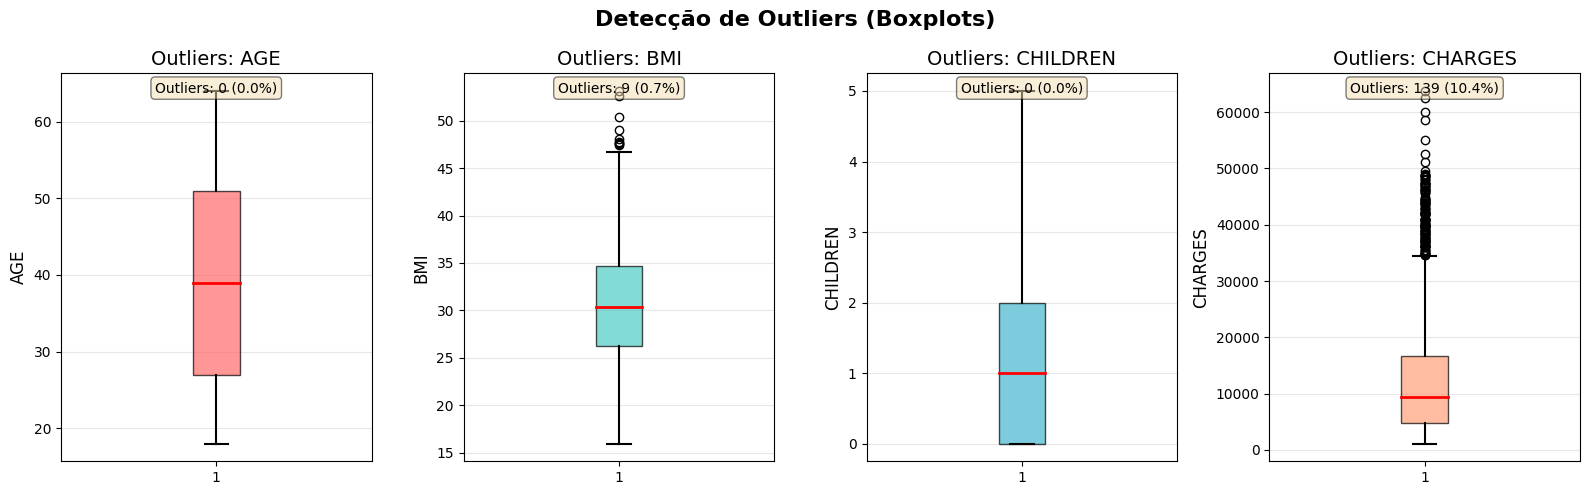

In [0]:
# 2.7 Análise de Outliers

fig, axes = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Detecção de Outliers (Boxplots)', fontsize=16, fontweight='bold')

outlier_cols = ['age', 'bmi', 'children', 'charges']
colors_outlier = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (col, color) in enumerate(zip(outlier_cols, colors_outlier)):
    bp = axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                           boxprops=dict(facecolor=color, alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(linewidth=1.5),
                           capprops=dict(linewidth=1.5))
    
    axes[idx].set_ylabel(col.upper(), fontsize=12)
    axes[idx].set_title(f'Outliers: {col.upper()}', fontsize=14)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Calcular outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Adicionar texto com número de outliers
    axes[idx].text(0.5, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                  transform=axes[idx].transAxes, ha='center', va='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

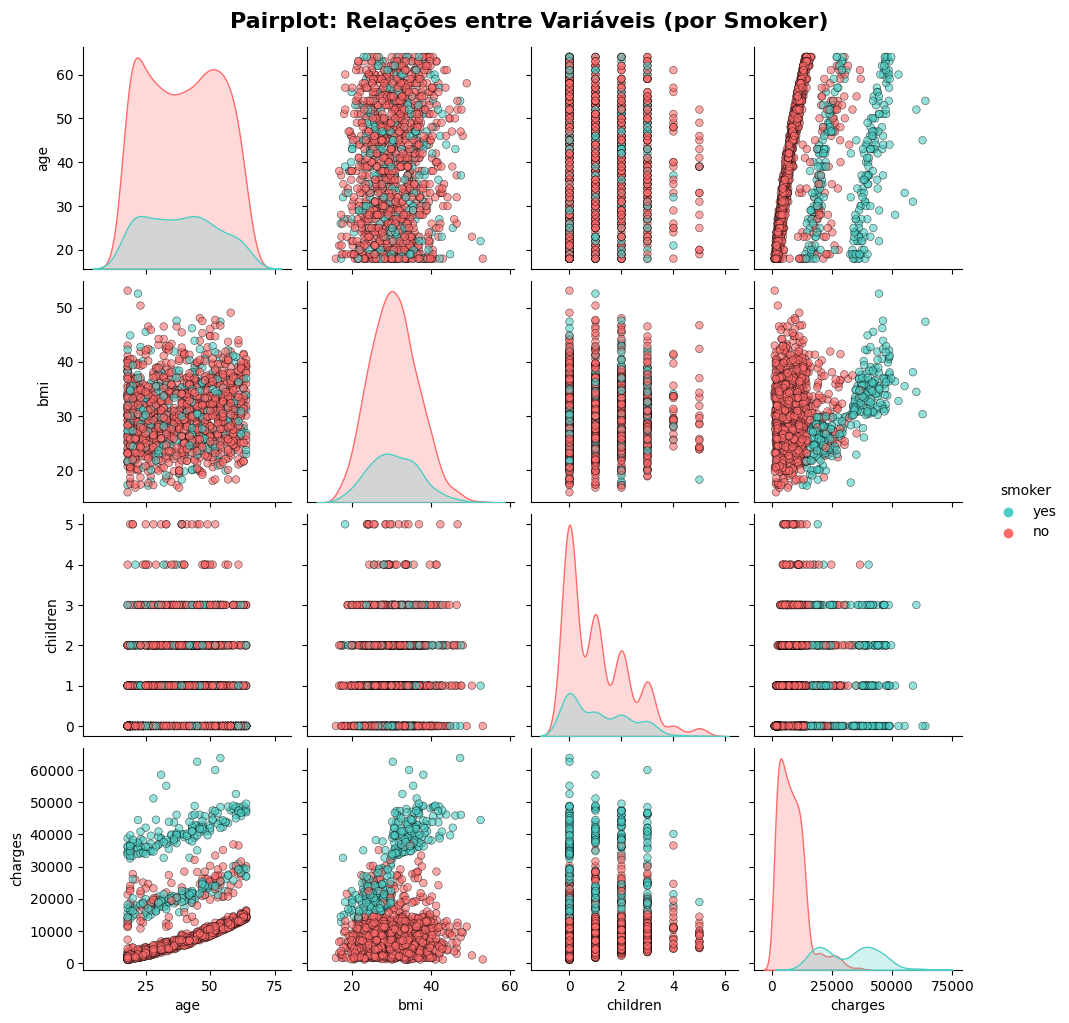

In [0]:
# 2.8 Pairplot (Relações entre todas as variáveis numéricas)

# Criar subset para pairplot
df_pairplot = df[['age', 'bmi', 'children', 'charges', 'smoker']].copy()

pairplot_fig = sns.pairplot(df_pairplot, hue='smoker', palette=['#4ECDC4', '#FF6B6B'],
                             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black'},
                             height=2.5)
pairplot_fig.fig.suptitle('Pairplot: Relações entre Variáveis (por Smoker)', 
                          y=1.02, fontsize=16, fontweight='bold')

plt.show()

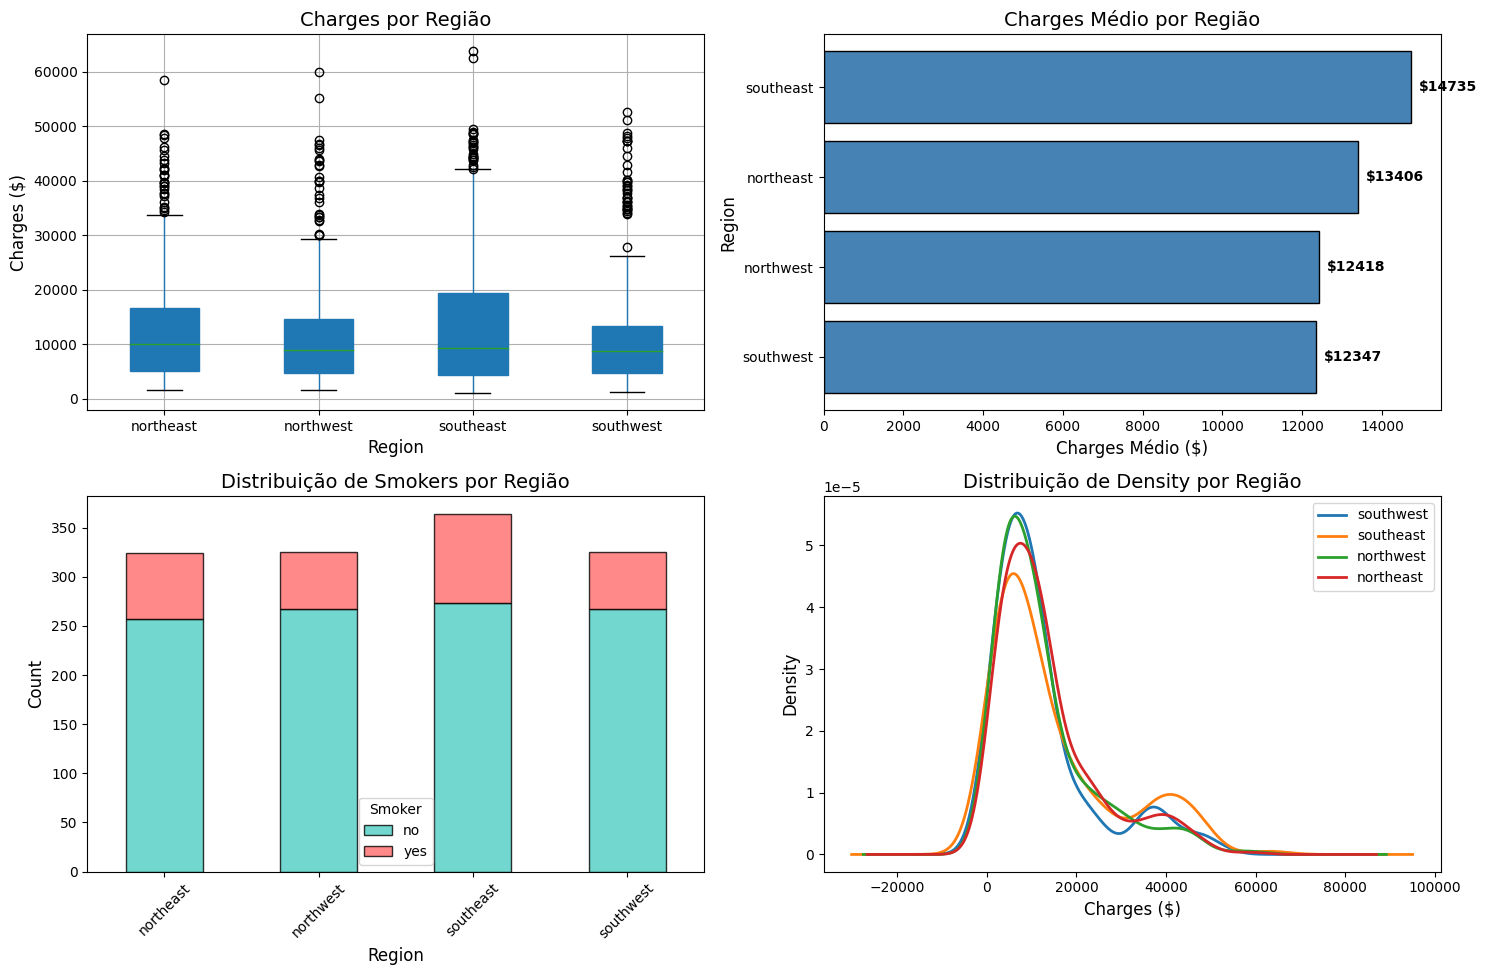

In [0]:
# 2.9 Análise de Distribuição por Região

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análise de Charges por Região', fontsize=16, fontweight='bold')

regions = df['region'].unique()

# Boxplot por região
df.boxplot(column='charges', by='region', ax=axes[0, 0], patch_artist=True)
axes[0, 0].set_xlabel('Region', fontsize=12)
axes[0, 0].set_ylabel('Charges ($)', fontsize=12)
axes[0, 0].set_title('Charges por Região', fontsize=14)
axes[0, 0].get_figure().suptitle('')

# Barplot de médias
means_region = df.groupby('region')['charges'].mean().sort_values()
axes[0, 1].barh(means_region.index, means_region.values, color='steelblue', edgecolor='black')
axes[0, 1].set_xlabel('Charges Médio ($)', fontsize=12)
axes[0, 1].set_ylabel('Region', fontsize=12)
axes[0, 1].set_title('Charges Médio por Região', fontsize=14)
for i, v in enumerate(means_region.values):
    axes[0, 1].text(v + 200, i, f'${v:.0f}', va='center', fontsize=10, fontweight='bold')

# Contagem de smokers por região
smoker_region = pd.crosstab(df['region'], df['smoker'])
smoker_region.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                   color=['#4ECDC4', '#FF6B6B'], edgecolor='black', alpha=0.8)
axes[1, 0].set_xlabel('Region', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_title('Distribuição de Smokers por Região', fontsize=14)
axes[1, 0].legend(title='Smoker')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# KDE por região
for region in regions:
    region_data = df[df['region'] == region]['charges']
    region_data.plot(kind='density', ax=axes[1, 1], label=region, linewidth=2)
axes[1, 1].set_xlabel('Charges ($)', fontsize=12)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].set_title('Distribuição de Density por Região', fontsize=14)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ETAPA 3: FEATURE ENGINEERING E PRÉ-PROCESSAMENTO

In [0]:
# CRIANDO COPIA DO DATAFRAME

df_processed = df.copy()

In [0]:
# 3.1 Feature Engineering

# Features polinomiais
df_processed['age_squared'] = df_processed['age'] ** 2
df_processed['age_cubed'] = df_processed['age'] ** 3
df_processed['bmi_squared'] = df_processed['bmi'] ** 2

# Features de interação
df_processed['bmi_age_interaction'] = df_processed['bmi'] * df_processed['age']
df_processed['bmi_children_interaction'] = df_processed['bmi'] * df_processed['children']
df_processed['age_children_interaction'] = df_processed['age'] * df_processed['children']

# Transformações logarítmicas
df_processed['log_age'] = np.log1p(df_processed['age'])
df_processed['log_bmi'] = np.log1p(df_processed['bmi'])

# Transformações exponenciais
df_processed['exp_bmi'] = np.exp(df_processed['bmi'] / 100)

# Features categóricas derivadas
df_processed['age_group'] = pd.cut(df_processed['age'], 
                                    bins=[0, 25, 35, 50, 100], 
                                    labels=['young', 'adult', 'middle_age', 'senior'])

df_processed['bmi_category'] = pd.cut(df_processed['bmi'], 
                                      bins=[0, 18.5, 25, 30, 35, 100],
                                      labels=['underweight', 'normal', 'overweight', 'obese_1', 'obese_2'])

df_processed['children_category'] = pd.cut(df_processed['children'], 
                                           bins=[-1, 0, 2, 10],
                                           labels=['no_children', 'few_children', 'many_children'])

# Indicadores binários
df_processed['is_smoker'] = (df_processed['smoker'] == 'yes').astype(int)
df_processed['is_male'] = (df_processed['sex'] == 'male').astype(int)
df_processed['has_children'] = (df_processed['children'] > 0).astype(int)
df_processed['is_obese'] = (df_processed['bmi'] >= 30).astype(int)
df_processed['is_senior'] = (df_processed['age'] >= 50).astype(int)

# Features compostas de risco
df_processed['high_risk'] = ((df_processed['smoker'] == 'yes') & 
                              (df_processed['bmi'] > 30)).astype(int)

df_processed['risk_score'] = (
    (df_processed['age'] / 100) * 0.25 +
    (df_processed['bmi'] / 50) * 0.25 +
    df_processed['is_smoker'] * 0.4 +
    (df_processed['children'] / 5) * 0.1
)

# Normalização
df_processed['bmi_normalized'] = (df_processed['bmi'] - df_processed['bmi'].mean()) / df_processed['bmi'].std()
df_processed['age_normalized'] = (df_processed['age'] - df_processed['age'].mean()) / df_processed['age'].std()

print(f" Features criadas: {df_processed.shape[1] - df.shape[1]} novas features")

 Features criadas: 21 novas features


In [0]:
# 3.2 Encoding

le_sex = LabelEncoder()
df_processed['sex_encoded'] = le_sex.fit_transform(df_processed['sex'])

df_processed = pd.get_dummies(df_processed, 
                               columns=['region', 'age_group', 'bmi_category', 'children_category'], 
                               drop_first=True, 
                               dtype=int)

print(f" Shape após encoding: {df_processed.shape}")

 Shape após encoding: (1338, 37)


In [0]:
# 3.3 Preparar X e y

X = df_processed.drop(['charges', 'sex', 'smoker'], axis=1)
y = df_processed['charges']

In [0]:
# 3.4 Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ETAPA 4: ANÁLISE DE COMPONENTES PRINCIPAIS (PCA)

In [0]:
# 4.1 Padronização

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
# 4.2 PCA

pca_full = PCA()
pca_full.fit(X_train_scaled)

variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

print(f"\n   Variância explicada:")
for i in range(min(10, len(variance_ratio))):
    bar = '█' * int(variance_ratio[i] * 100)
    print(f"   PC{i+1:<3} {variance_ratio[i]*100:>6.2f}%  Acum: {cumulative_variance[i]*100:>6.2f}%  {bar}")

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\n  Componentes para 95% variância: {n_components_95}/{X.shape[1]}")
print(f"    Redução: {X.shape[1] - n_components_95} features ({(X.shape[1] - n_components_95)/X.shape[1]*100:.1f}%)")


   Variância explicada:
   PC1    25.27%  Acum:  25.27%  █████████████████████████
   PC2    17.65%  Acum:  42.92%  █████████████████
   PC3    12.73%  Acum:  55.66%  ████████████
   PC4     7.33%  Acum:  62.98%  ███████
   PC5     5.72%  Acum:  68.71%  █████
   PC6     5.24%  Acum:  73.95%  █████
   PC7     4.74%  Acum:  78.69%  ████
   PC8     4.20%  Acum:  82.89%  ████
   PC9     3.89%  Acum:  86.78%  ███
   PC10    3.88%  Acum:  90.66%  ███

  Componentes para 95% variância: 12/34
    Redução: 22 features (64.7%)


In [0]:
# 4.3 Aplicar PCA

pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [0]:
# 4.4 Loadings

loadings_df = pd.DataFrame(
    pca.components_[:min(3, n_components_95)].T,
    columns=[f'PC{i+1}' for i in range(min(3, n_components_95))],
    index=X.columns
)

for i in range(min(3, n_components_95)):
    top_features = loadings_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5)
    for j, (feat, loading) in enumerate(top_features.items(), 1):
        actual = loadings_df.loc[feat, f'PC{i+1}']

# ETAPA 5: K-MEANS CLUSTERING

In [0]:
# 5.1 Determinar k ótimo

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    sil_score = silhouette_score(X_train_pca, kmeans.labels_)
    silhouette_scores.append(sil_score)

optimal_k = K_range[np.argmax(silhouette_scores)]

for i, k in enumerate(K_range):
    marker = " ← ÓTIMO" if k == optimal_k else ""

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0560364540>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

In [0]:
# 5.2 Aplicar K-means

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_train = kmeans_final.fit_predict(X_train_pca)
clusters_test = kmeans_final.predict(X_test_pca)
unique, counts = np.unique(clusters_train, return_counts=True)
for cluster_id, count in zip(unique, counts):
    percentage = (count / len(clusters_train)) * 100
    bar = '█' * int(percentage / 2)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f04b4171260>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

In [0]:
# 5.3 Perfil dos clusters

X_train_with_cluster = X_train.copy()
X_train_with_cluster['cluster'] = clusters_train
train_data_analysis = X_train_with_cluster.copy()
train_data_analysis['charges'] = y_train.values

key_features = ['age', 'bmi', 'is_smoker', 'is_obese']
cluster_profiles = train_data_analysis.groupby('cluster')[key_features + ['charges']].mean()

In [0]:
# 5.4 ANOVA entre clusters

for var in ['age', 'bmi', 'charges']:
    groups = [train_data_analysis[train_data_analysis['cluster'] == i][var] 
              for i in range(optimal_k)]
    f_stat, p_value = f_oneway(*groups)
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"

# ETAPA 6: MODELAGEM

In [0]:
# CRIANDO LISTA

results = {}

In [0]:
# Modelos selecionados
models = {
    'Ridge Regression (L2)': Ridge(alpha=10.0, random_state=42),
    'Random Forest': RandomForestRegressor(
        n_estimators=200, 
        max_depth=20, 
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42, 
        n_jobs=-1
    ),
    'Linear Regression': LinearRegression(),
    'Lasso Regression (L1)': Lasso(alpha=1.0, random_state=42, max_iter=5000)
}

print(f"\n 6.1 TREINAMENTO DOS MODELOS")

for name, model in models.items():
    print(f"\n Treinando {name}...")
    
    # Treinar
    model.fit(X_train_scaled, y_train)
    
    # Predições
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Métricas
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    results[name] = {
        'model': model,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse': rmse_test,
        'mae': mae_test,
        'mape': mape_test,
        'overfitting': abs(r2_train - r2_test)
    }
    
    print(f"      • R² Train:    {r2_train:.4f}")
    print(f"      • R² Test:     {r2_test:.4f}")
    print(f"      • RMSE:        ${rmse_test:,.2f}")
    print(f"      • MAE:         ${mae_test:,.2f}")
    print(f"      • MAPE:        {mape_test:.2f}%")
    print(f"      • Overfitting: {abs(r2_train - r2_test):.4f}")


 6.1 TREINAMENTO DOS MODELOS

 Treinando Ridge Regression (L2)...
      • R² Train:    0.8657
      • R² Test:     0.8819
      • RMSE:        $4,282.68
      • MAE:         $2,392.46
      • MAPE:        30.70%
      • Overfitting: 0.0162

 Treinando Random Forest...
      • R² Train:    0.9451
      • R² Test:     0.8814
      • RMSE:        $4,290.14
      • MAE:         $2,412.61
      • MAPE:        30.44%
      • Overfitting: 0.0637

 Treinando Linear Regression...
      • R² Train:    0.8662
      • R² Test:     0.8802
      • RMSE:        $4,311.93
      • MAE:         $2,422.98
      • MAPE:        30.77%
      • Overfitting: 0.0140

 Treinando Lasso Regression (L1)...
      • R² Train:    0.8660
      • R² Test:     0.8801
      • RMSE:        $4,313.60
      • MAE:         $2,413.54
      • MAPE:        30.63%
      • Overfitting: 0.0142


# ETAPA 7: COMPARAÇÃO E SELEÇÃO DO MELHOR MODELO

In [0]:
results_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'R² Test': [results[m]['r2_test'] for m in results.keys()],
    'RMSE ($)': [results[m]['rmse'] for m in results.keys()],
    'MAE ($)': [results[m]['mae'] for m in results.keys()],
    'MAPE (%)': [results[m]['mape'] for m in results.keys()],
    'Overfitting': [results[m]['overfitting'] for m in results.keys()]
})

results_df = results_df.sort_values('R² Test', ascending=False).reset_index(drop=True)
results_df.index = results_df.index + 1

print(f"\n RANKING DOS MODELOS")
print(results_df.to_string())

best_model_name = results_df.iloc[0]['Modelo']
best_model = results[best_model_name]['model']
best_r2 = results_df.iloc[0]['R² Test']
best_rmse = results_df.iloc[0]['RMSE ($)']
best_mae = results_df.iloc[0]['MAE ($)']
best_mape = results_df.iloc[0]['MAPE (%)']

print(f" MELHOR MODELO: {best_model_name}")
print(f"\n  MÉTRICAS:")
print(f"      • R² Score:    {best_r2:.4f} ({best_r2*100:.2f}% da variância explicada)")
print(f"      • RMSE:        ${best_rmse:,.2f}")
print(f"      • MAE:         ${best_mae:,.2f}")
print(f"      • MAPE:        {best_mape:.2f}%")

# Análise de resíduos
y_pred_best = best_model.predict(X_test_scaled)
residuals = y_test - y_pred_best

print(f"\n  ANÁLISE DE RESÍDUOS:")
print(f"      • Média: ${residuals.mean():.2f}")
print(f"      • Desvio padrão: ${residuals.std():.2f}")
print(f"      • Mínimo: ${residuals.min():.2f}")
print(f"      • Máximo: ${residuals.max():.2f}")

# Feature Importance (apenas para Random Forest)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n TOP 15 FEATURES MAIS IMPORTANTES")
    
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False).reset_index(drop=True)
    
    print(f"\n   {'Rank':<6} {'Feature':<35} {'Importance':<12} {'%'}")
    print("   " + "-"*70)
    
    total_importance = feature_importance_df['Importance'].sum()
    for i, row in feature_importance_df.head(15).iterrows():
        importance_pct = (row['Importance'] / total_importance) * 100
        bar = '█' * int(importance_pct * 2)
        print(f"   {i+1:<6} {row['Feature']:<35} {row['Importance']:>10.4f}   {importance_pct:>5.2f}%  {bar}")


 RANKING DOS MODELOS
                  Modelo   R² Test     RMSE ($)      MAE ($)   MAPE (%)  Overfitting
1  Ridge Regression (L2)  0.881859  4282.675426  2392.457120  30.700415     0.016178
2          Random Forest  0.881447  4290.136893  2412.613639  30.436303     0.063697
3      Linear Regression  0.880239  4311.927414  2422.982783  30.767760     0.014041
4  Lasso Regression (L1)  0.880146  4313.601801  2413.543449  30.629421     0.014172
 MELHOR MODELO: Ridge Regression (L2)

  MÉTRICAS:
      • R² Score:    0.8819 (88.19% da variância explicada)
      • RMSE:        $4,282.68
      • MAE:         $2,392.46
      • MAPE:        30.70%

  ANÁLISE DE RESÍDUOS:
      • Média: $-138.35
      • Desvio padrão: $4288.45
      • Mínimo: $-3132.40
      • Máximo: $21269.97


# ETAPA 8: VALIDAÇÃO CRUZADA (Cross-Validation)

In [0]:
# CRIANDO LISTA

cv_results = {}

In [0]:
for name, model in models.items():
    print(f"\n    Validação cruzada: {name}...")
    
    # Executar CV com 5 folds
    cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                 cv=5, scoring='r2', n_jobs=-1)
    
    cv_results[name] = {
        'scores': cv_scores,
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }
    
    # Intervalo de confiança
    ci_lower = cv_scores.mean() - 1.96 * cv_scores.std()
    ci_upper = cv_scores.mean() + 1.96 * cv_scores.std()
    
    print(f"\n      {'Fold':<8} {'R² Score'}")
    print("      " + "-"*25)
    for i, score in enumerate(cv_scores, 1):
        print(f"      Fold {i}    {score:.4f}")
    print("      " + "-"*25)
    print(f"      Média     {cv_scores.mean():.4f}")
    print(f"      Std       {cv_scores.std():.4f}")
    print(f"      IC 95%    [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"      Status    {'ESTÁVEL ' if cv_scores.std() < 0.05 else 'VARIÁVEL '}")

# Comparação dos resultados de CV
print(f"\n COMPARAÇÃO DE VALIDAÇÃO CRUZADA")


cv_comparison = pd.DataFrame({
    'Modelo': list(cv_results.keys()),
    'CV Média': [cv_results[m]['mean'] for m in cv_results.keys()],
    'CV Std': [cv_results[m]['std'] for m in cv_results.keys()],
    'R² Test': [results[m]['r2_test'] for m in cv_results.keys()]
})

cv_comparison = cv_comparison.sort_values('CV Média', ascending=False).reset_index(drop=True)
cv_comparison.index = cv_comparison.index + 1

print(f"\n{cv_comparison.to_string()}")

print(f"\n INTERPRETAÇÃO:")
print(f"   • CV Média: Performance média em diferentes subconjuntos dos dados")
print(f"   • CV Std: Variabilidade do modelo (quanto menor, mais estável)")
print(f"   • R² Test: Performance no conjunto de teste separado")
print(f"   • Modelos com CV Std < 0.05 são considerados ESTÁVEIS")


    Validação cruzada: Ridge Regression (L2)...

      Fold     R² Score
      -------------------------
      Fold 1    0.8411
      Fold 2    0.9267
      Fold 3    0.8437
      Fold 4    0.8049
      Fold 5    0.8610
      -------------------------
      Média     0.8555
      Std       0.0400
      IC 95%    [0.7770, 0.9340]
      Status    ESTÁVEL 

    Validação cruzada: Random Forest...

      Fold     R² Score
      -------------------------
      Fold 1    0.8238
      Fold 2    0.9126
      Fold 3    0.8084
      Fold 4    0.7867
      Fold 5    0.8478
      -------------------------
      Média     0.8359
      Std       0.0432
      IC 95%    [0.7511, 0.9206]
      Status    ESTÁVEL 

    Validação cruzada: Linear Regression...

      Fold     R² Score
      -------------------------
      Fold 1    0.8397
      Fold 2    0.9241
      Fold 3    0.8403
      Fold 4    0.8047
      Fold 5    0.8572
      -------------------------
      Média     0.8532
      Std       0.0394

/databricks/python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+08, tolerance: 1.222e+07
  model = cd_fast.enet_coordinate_descent(
/databricks/python/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.940e+08, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(


In [0]:
# CONCLUSÃO FINAL

print(" PIPELINE COMPLETO EXECUTADO")

print(f"\n RESUMO FINAL:")
print(f"   • Dataset: {len(df)} amostras, {df.shape[1]} features originais")
print(f"   • Features finais: {X.shape[1]} (após engenharia)")
print(f"   • PCA: {n_components_95} componentes (95% variância)")
print(f"   • K-means: {optimal_k} clusters")
print(f"   • Modelos avaliados: 4 (melhores selecionados)")
print(f"   • Melhor modelo: {best_model_name}")
print(f"   • R² final: {best_r2:.4f}")
print(f"   • Validação cruzada: {cv_results[best_model_name]['mean']:.4f} ± {cv_results[best_model_name]['std']:.4f}")

 PIPELINE COMPLETO EXECUTADO

 RESUMO FINAL:
   • Dataset: 1338 amostras, 7 features originais
   • Features finais: 34 (após engenharia)
   • PCA: 12 componentes (95% variância)
   • K-means: 2 clusters
   • Modelos avaliados: 4 (melhores selecionados)
   • Melhor modelo: Ridge Regression (L2)
   • R² final: 0.8819
   • Validação cruzada: 0.8555 ± 0.0400
